## Estadística Aplicada

Sesión 6 - 23 agosto

Karla Mariana Ley Acero - 2076201

Grupo 42

In [10]:
# Importar las librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Collecting openpyxl
                                              0.0/250.0 kB ? eta -:--:--
     ------                                41.0/250.0 kB 653.6 kB/s eta 0:00:01
     -----------------                      112.6/250.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.7 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Importar libreria especializada

import statsmodels.formula.api as smf

In [22]:
## Importar los datos 

datos = pd.read_excel('modelolineal.xlsx')

In [26]:
datos.head()

,X,Y
0,23,19.246957
1,19,16.878501
2,27,20.187237
3,13,12.176789
4,21,21.420112


In [25]:
#quitamos observacion para no confundirlo con el index
datos = datos[['X', 'Y']]
datos.head()


,X,Y
0,23,19.246957
1,19,16.878501
2,27,20.187237
3,13,12.176789
4,21,21.420112


## **REPASO BREVE MINIMOS CUADRADOS**

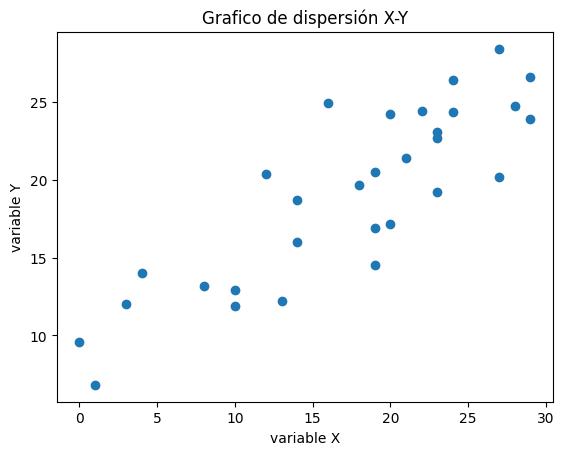

In [31]:
## Hacer grafico de dispersión
# plt.scatter(eje x, eje y)

plt.scatter(datos['X'], datos['Y'])
plt.title('Grafico de dispersión X-Y')
plt.xlabel('variable X')
plt.ylabel('variable Y')
plt.show()

#¿Existe una relación lineal entre estos puntos visualmente? Sí, por lo que es plausible estimar MC

De acuerdo con la gráfica hay una relación lineal entre X y Y, es plausible estimar un modelo lineal de MCO

In [33]:
## ESTIMAR EL MODELO 

# 1. Definir el modelo 
# Primero va la variable dependiente Y, luego indicar donde estan ubicados los datos
reg = smf.ols(formula= 'Y~X', data=datos)

# 2. Estimar el modelo

results = reg.fit()

# 3. Pedir que nos muestre el modelo

print(results.summary())

# Nos indica un p-value, eso indica que hay una hipotesis 


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        15:41:24   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

### **INTERPRETACION DE RESULTADOS**

Hipótesis del primer p-value:

H0 = B0 = 0
Ha = B0 != 0 

Segundo p-value

H0 = B1 = 0
Ha = B1 != 0

**Para B0**

Intercepto: p-value < alfa 

Con 95% rechazamos H0, significa que el intercepto es distinto de cero, estimamos un valor de 8.96

**Para B1**

¿p-value < alfa? En este caso no

Con 95% de confianza rechazamos H0. Significa que "X" afecta a "Y".
En promedio, cuando X incrementa en una unidad Y incrementa en 0.58



### Validación cruzada

In [34]:
## Definir el conjunto de entrenamiento 

# Elegir las primeras 20 observaciones

train_set = datos.iloc[0:20]

## Definir el conjunto de evaluacion
# Del 20 hasta que se acabe

test_set = datos.iloc[20:]

In [35]:
# Estimar la regresion con el conjunto de entrenamiento

reg1 = smf.ols(formula = 'Y~X', data= train_set)
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     28.80
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.23e-05
Time:                        16:10:55   Log-Likelihood:                -51.332
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2336      2.008      4.598      0.0

In [36]:
## Pronosticar los valores del conjunto de evaluacion 

test_set['Y_hat'] = results1.predict(test_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8028\433009935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat'] = results1.predict(test_set)


In [40]:
test_set

# Nos da el valor de Y pronosticado

,X,Y,Y_hat
20,0,9.544102,9.233587
21,20,24.230330,20.117395
22,24,26.417826,22.294157
23,23,23.066723,21.749966
24,8,13.145005,13.587110
25,24,24.385156,22.294157
26,10,12.934102,14.675491
27,4,14.002469,11.410349
28,29,26.599047,25.015109
29,10,11.910387,14.675491


In [44]:
# Para evaluar se usa el MAD (Desviación Absoluta Media)

# Lo usamos para evaluar que tan bien pronostica el modelo el conjunto de evaluación

MAD = (test_set['Y']-test_set['Y_hat']).abs().mean()

In [45]:
print(MAD)

2.107953156470991
